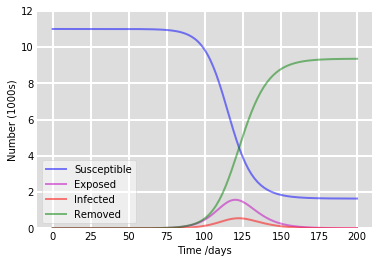

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 11000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, E0, R0 = 1,1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - (E0 + I0 + R0)
# Serial Interval and mean latent/Incubation Period
SI, DE = 8.4, 6
#Infectious period
DI = SI - DE
#Basic Reproduction number
R_0 = 2.5
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
gamma, sigma= 1/DI, 1/DE
beta =  gamma*R_0
#mortality rate of infected individuals
mu = 0.049
# A grid of time points (in days)
t = np.linspace(0, 200, 200)

# The SEIR model differential equations.
def deriv(y, t, N, beta,sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N  
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu * I 
    dRdt = gamma*I + mu*I 
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta,sigma, gamma))
S, E, I, R = ret.T

# Plot the data on three separate curves for S(t), E(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000000, 'm', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000000, 'g', alpha=0.5, lw=2, label='Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Population (Millions)')
ax.set_ylim(0,12)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
fig.savefig('SEIR_simple.pdf')